<a href="https://colab.research.google.com/github/Yash19815/house-price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)
df = pd.read_csv(path+"/Housing.csv")
df.head()

Path to dataset files: /kaggle/input/housing-price-prediction


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


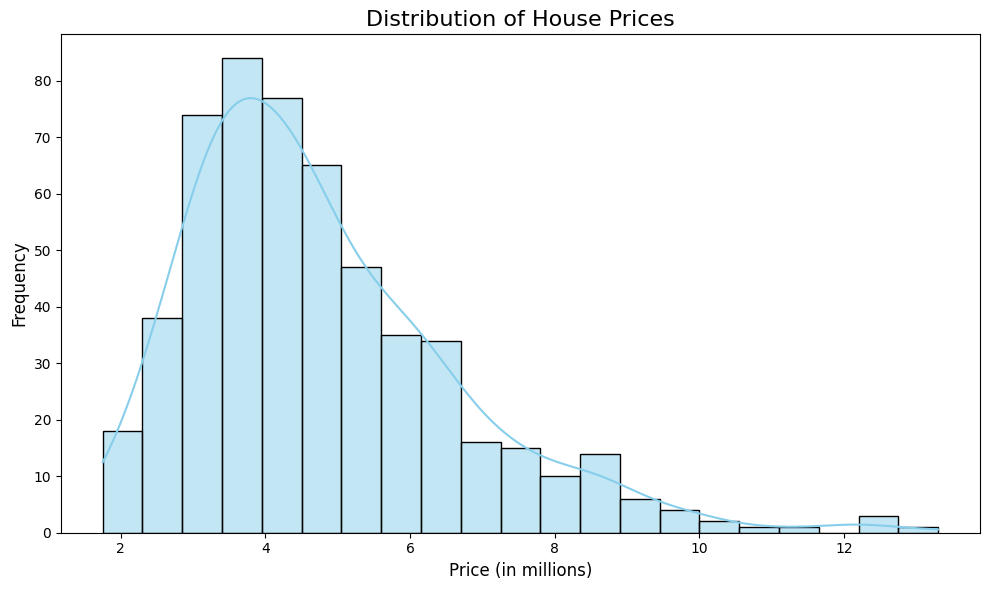

In [ ]:
# Transforming price to millions for better readability
df['price_millions'] = df['price'] / 1e6

plt.figure(figsize=(10, 6))
sns.histplot(df['price_millions'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

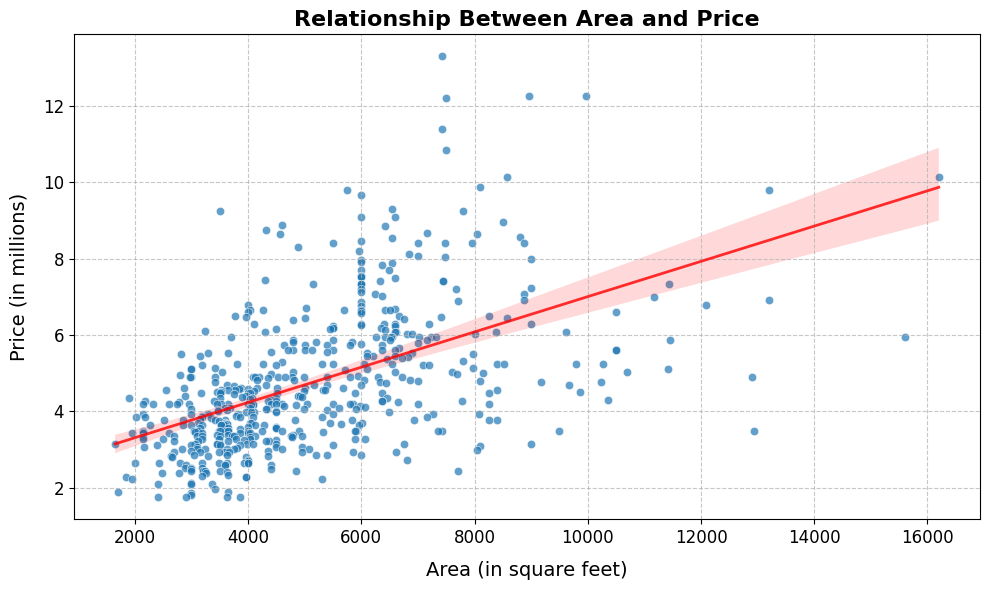

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['area'], y=df['price_millions'], alpha=0.7, edgecolor='w')

sns.regplot(x=df['area'], y=df['price_millions'], scatter=False, color='red', line_kws={'linewidth': 2, 'alpha': 0.8})

plt.title("Relationship Between Area and Price", fontsize=16, fontweight='bold')
plt.xlabel("Area (in square feet)", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning',
                'hotwaterheating', 'basement', 'guestroom', 'mainroad']

for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,13.300
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,12.250
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,12.250
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,12.215
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,11.410


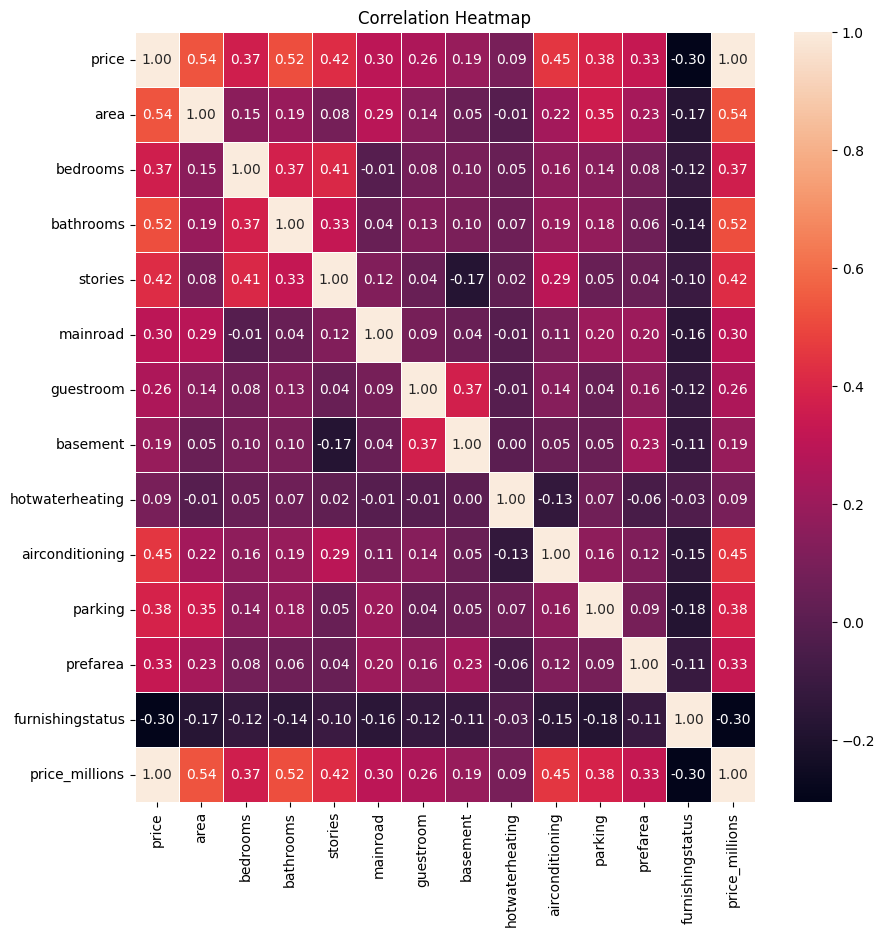

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = df.drop(columns=['price'], axis=1)

X = df.drop(columns=['price_millions'], axis=1)
y = df['price_millions']

In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = ln_model.predict(X_test)

ln_r2 = r2_score(y_test, y_pred)
ln_mae = mean_absolute_error(y_test, y_pred)
ln_mse = mean_squared_error(y_test, y_pred)
ln_rmse = np.sqrt(ln_mse)

print("Linear Regression Metrics:")
print("R² Score:", ln_r2)
print("Mean Absolute Error (MAE):", ln_mae)
print("Mean Squared Error (MSE):", ln_mse)
print("Root Mean Squared Error (RMSE):", ln_rmse)

Linear Regression Metrics:
R² Score: 0.7624579467323475
Mean Absolute Error (MAE): 0.06332171625253742
Mean Squared Error (MSE): 0.006055724882518719
Root Mean Squared Error (RMSE): 0.07781853816744902
